In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/game-of-thronesgot/game of thrones.csv


In [2]:
df=pd.read_csv("../input/game-of-thronesgot/game of thrones.csv")

In [3]:
df.head()

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,17-Apr-11,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,24-Apr-11,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,1-May-11,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,8-May-11,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,15-May-11,2.58,9.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No. overall             73 non-null     int64  
 1   No. in season           73 non-null     int64  
 2   Season                  73 non-null     int64  
 3   Title                   73 non-null     object 
 4   Directed by             73 non-null     object 
 5   Written by              73 non-null     object 
 6   Novel(s) adapted        73 non-null     object 
 7   Original air date       61 non-null     object 
 8   U.S. viewers(millions)  70 non-null     float64
 9   Imdb rating             73 non-null     float64
dtypes: float64(2), int64(3), object(5)
memory usage: 5.8+ KB


In [5]:
df.shape

(73, 10)

# Data Cleaning

In [6]:
df.isnull().sum()

No. overall                0
No. in season              0
Season                     0
Title                      0
Directed by                0
Written by                 0
Novel(s) adapted           0
Original air date         12
U.S. viewers(millions)     3
Imdb rating                0
dtype: int64

In [7]:
df[df['U.S. viewers(millions)'].isnull()]

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
26,27,7,3,"""The Bear and the Maiden Fair""",Michelle MacLaren,George R. R. Martin,A Storm of Swords,NaN,NaN,8.7
38,39,9,4,"""The Watchers on the Wall""",Neil Marshall,David Benioff & D. B. Weiss,A Storm of Swords,8-Jun-14,NaN,9.6
55,56,6,6,"""Blood of My Blood""",Jack Bender,Bryan Cogman,Outline from The Winds of Winter and original ...,19-May-16,NaN,8.4


In [8]:
df[df['Original air date'].isnull()]

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
6,7,7,1,"""You Win or You Die""",Daniel Minahan,David Benioff & D. B. Weiss,A Game of Thrones,NaN,2.40,9.2
11,12,2,2,"""The Night Lands""",Alan Taylor,David Benioff & D. B. Weiss,A Clash of Kings,NaN,3.76,8.5
12,13,3,2,"""What Is Dead May Never Die""",Alik Sakharov,Bryan Cogman,A Clash of Kings,NaN,3.77,8.8
16,17,7,2,"""A Man Without Honor""",David Nutter,David Benioff & D. B. Weiss,A Clash of Kings,NaN,3.69,8.9
26,27,7,3,"""The Bear and the Maiden Fair""",Michelle MacLaren,George R. R. Martin,A Storm of Swords,NaN,NaN,8.7
36,37,7,4,"""Mockingbird""",Alik Sakharov,David Benioff & D. B. Weiss,A Storm of Swords,NaN,7.20,9.1
46,47,7,5,"""The Gift""",Miguel Sapochnik,David Benioff & D. B. Weiss,"A Feast for Crows, A Dance with Dragons and or...",NaN,5.40,9.0
47,48,8,5,"""Hardhome""",Miguel Sapochnik,David Benioff & D. B. Weiss,"A Feast for Crows, A Dance with Dragons and or...",NaN,7.01,9.9
54,55,5,6,"""The Door""",Jack Bender,David Benioff & D. B. Weiss,Outline from The Winds of Winter and original ...,NaN,7.89,9.7
60,61,1,7,"""Dragonstone""",Jeremy Podeswa,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,NaN,10.11,8.6


In [9]:
#Filling values in U.S. viewers(millions) column----
df.at[26,['U.S. viewers(millions)']]=4.84
df.at[38,['U.S. viewers(millions)']]=6.95
df.at[55,['U.S. viewers(millions)']]=6.71

In [10]:
df[df['U.S. viewers(millions)'].isnull()]

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating


In [11]:
#Filling Values in Original air date column---
df.at[6,['Original air date']]='29-May-11'
df.at[11,['Original air date']]='8-April-12'
df.at[12,['Original air date']]='15-April-12'
df.at[16,['Original air date']]='13-May-12'
df.at[26,['Original air date']]='12-May-13'
df.at[36,['Original air date']]='18-May-14'
df.at[46,['Original air date']]='24-May-15'
df.at[47,['Original air date']]='31-May-15'
df.at[54,['Original air date']]='22-May-16'
df.at[60,['Original air date']]='16-July-17'
df.at[67,['Original air date']]='14-April-19'
df.at[68,['Original air date']]='21-April-19'

In [12]:
df.isnull().sum()

No. overall               0
No. in season             0
Season                    0
Title                     0
Directed by               0
Written by                0
Novel(s) adapted          0
Original air date         0
U.S. viewers(millions)    0
Imdb rating               0
dtype: int64

In [13]:
#Converting dtype object to datetime64[ns] dtype---
df['Original air date']=pd.to_datetime(df['Original air date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   No. overall             73 non-null     int64         
 1   No. in season           73 non-null     int64         
 2   Season                  73 non-null     int64         
 3   Title                   73 non-null     object        
 4   Directed by             73 non-null     object        
 5   Written by              73 non-null     object        
 6   Novel(s) adapted        73 non-null     object        
 7   Original air date       73 non-null     datetime64[ns]
 8   U.S. viewers(millions)  73 non-null     float64       
 9   Imdb rating             73 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 5.8+ KB


In [15]:
df.head()

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-17,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-24,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-01,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,2011-05-08,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-15,2.58,9.1


# Plotting Graphs

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('fivethirtyeight')

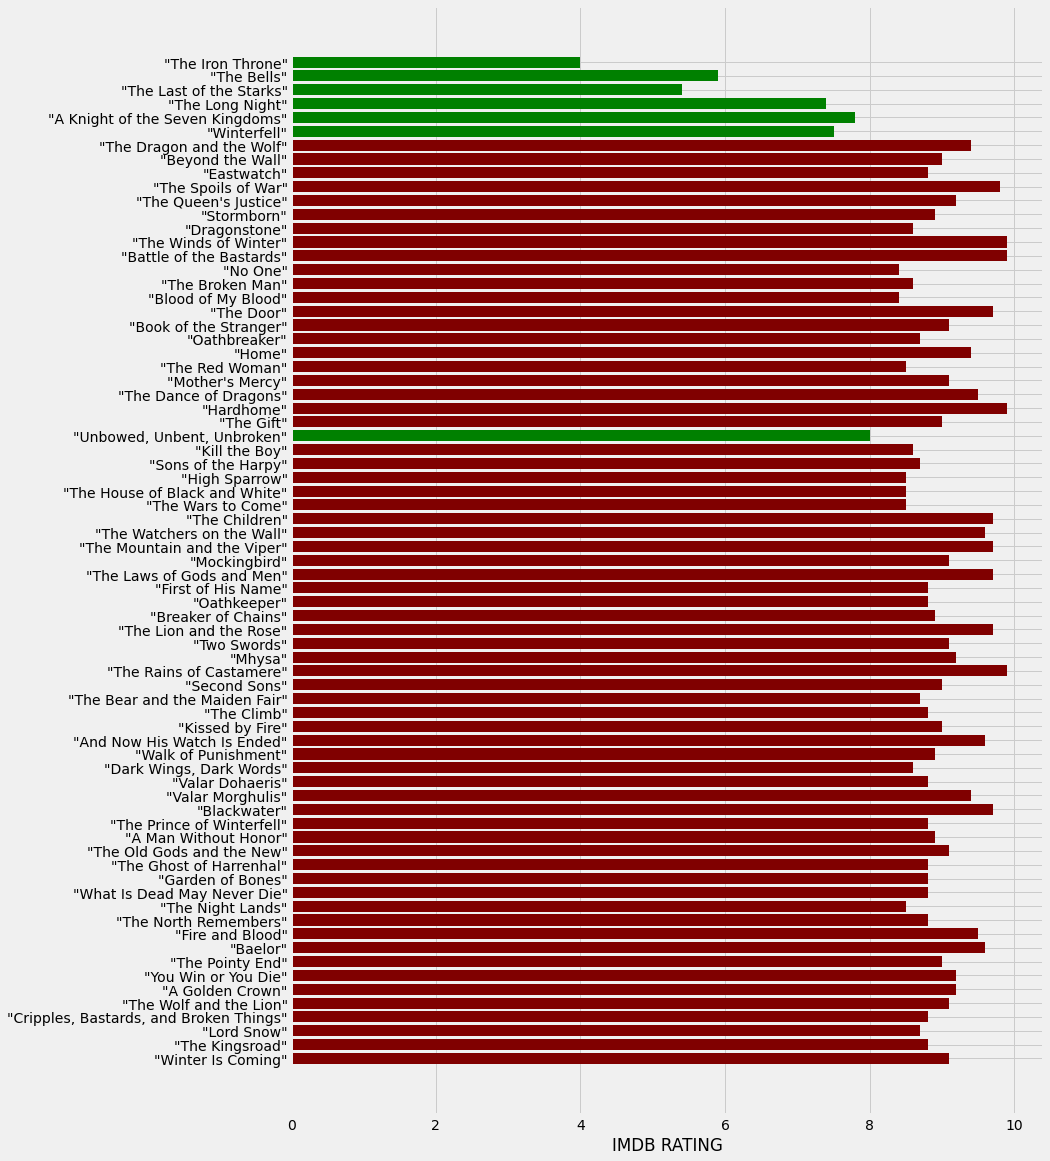

In [17]:
#Imdb rating <=8
plt.gcf().set_size_inches(12,19)
plt.barh(df['Title'],df['Imdb rating'],color=(df['Imdb rating']<=8).map({True:'green',False:'maroon'}))
plt.xlabel('IMDB RATING')
plt.show()

In [18]:
df['Directed by'].unique()

array(['Tim Van Patten', 'Brian Kirk', 'Daniel Minahan', 'Alan Taylor',
       'Alik Sakharov', 'David Petrarca', 'David Nutter', 'Neil Marshall',
       'David Benioff', 'Alex Graves', 'Michelle MacLaren', 'D. B. Weiss',
       'Michael Slovis', 'Mark Mylod', 'Jeremy Podeswa',
       'Miguel Sapochnik', 'Daniel Sackheim', 'Jack Bender',
       'Matt Shakman', 'David Benioff & D. B. Weiss'], dtype=object)

In [19]:
#Who directed the most.......
df['Directed by'].max()

'Tim Van Patten'

In [20]:
df['Written by'].unique()

array(['David Benioff & D. B. Weiss', 'Bryan Cogman',
       'George R. R. Martin', 'Vanessa Taylor', 'Dave Hill'], dtype=object)

In [21]:
#Who wrote the most.......
df['Written by'].max()

'Vanessa Taylor'

In [22]:
df['Novel(s) adapted'].unique()

array(['A Game of Thrones', 'A Clash of Kings', 'A Storm of Swords',
       'A Feast for Crows, A Dance with Dragons and original content',
       'Outline from The Winds of Winter and original content ',
       'Outline from A Dream of Spring and original content '],
      dtype=object)

In [23]:
df['Novel(s) adapted'].max()

'Outline from The Winds of Winter and original content '

In [24]:
df.head()

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-17,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-24,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-01,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,2011-05-08,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-15,2.58,9.1


<BarContainer object of 73 artists>

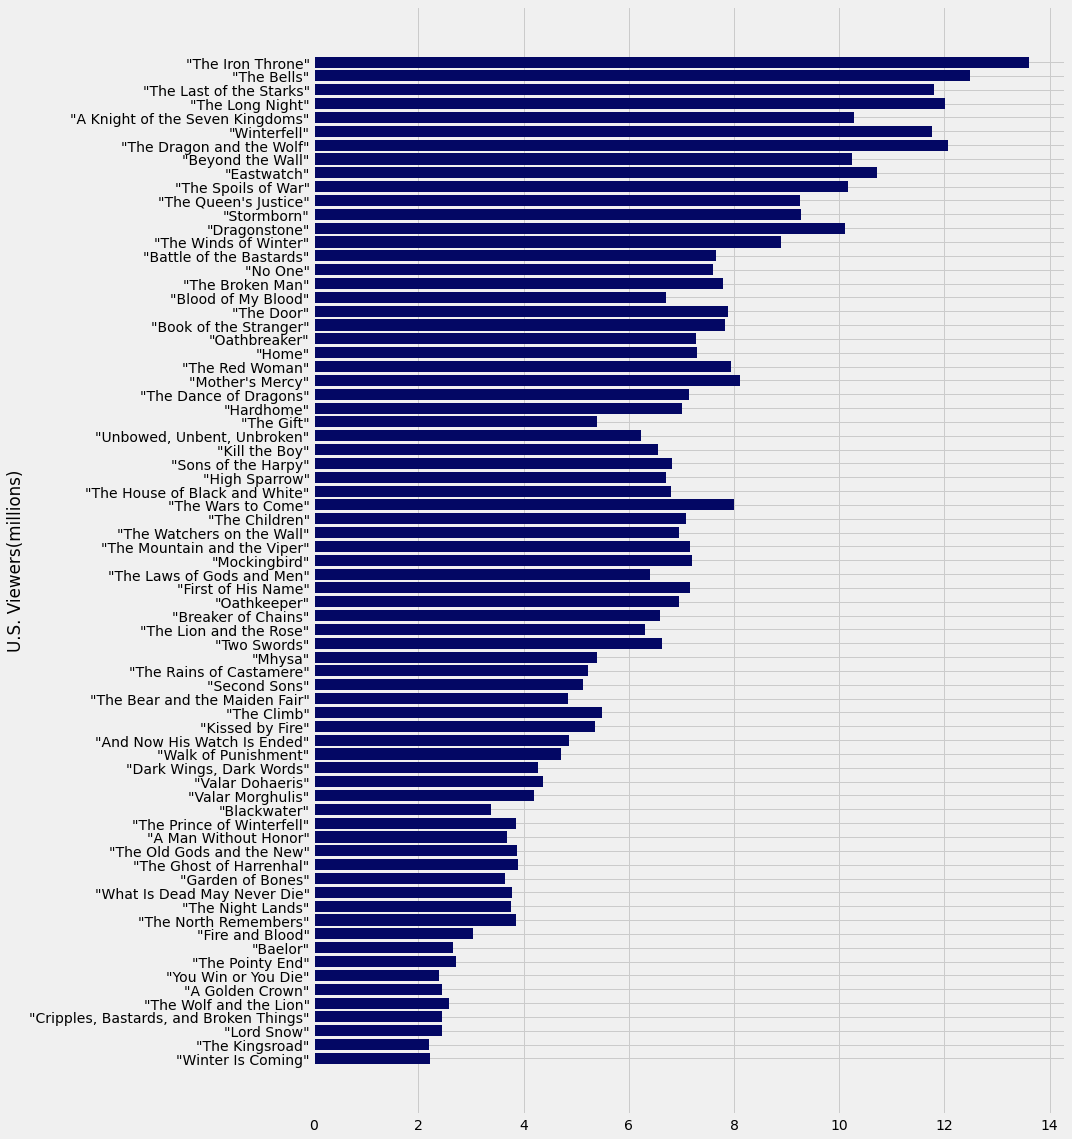

In [25]:
plt.gcf().set_size_inches(12,19)
plt.ylabel("U.S. Viewers(millions)")
plt.barh(df['Title'],df['U.S. viewers(millions)'].values,color='#030764')

**From this graph and from the previous graph we observe that the title which has max viewers has the min IMDB rating....**